In [2]:
import random
import pandas as pd
import matplotlib.pyplot as plt


import torch
from monai.transforms import LoadImage

from scripts.utils import get_subjects_files_paths

/home/ids/mahdi-22/M-M/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load original data
metadata = pd.read_csv("Data_original/OpenDataset/211230_M&Ms_Dataset_information_diagnosis_opendataset.csv", index_col=0)

metadata.head(5)


,External code,VendorName,Vendor,Centre,ED,ES,Age,Pathology,Sex,Height,Weight
0,A0S9V9,Siemens,A,1,0,9,67,DCM,M,180.0,88.0
1,A1D0Q7,Philips,B,2,0,9,79,HCM,F,NaN,88.0
2,A1D9Z7,Siemens,A,1,22,11,53,HCM,M,175.0,75.0
3,A1E9Q1,Siemens,A,1,0,9,16,DCM,M,175.0,75.0
4,A1K2P5,Canon,D,5,33,11,35,DCM,F,170.0,NaN


In [37]:
# Gather metadata and save them to datafreame
root_directory = "Data_original/OpenDataset"

metadata = metadata.assign(time_dim=None, x_dim=None, y_dim=None, z_dim=None)
metadata = metadata.assign(x_pixdim=None, y_pixdim=None, z_pixdim=None)


for centre in range(1,6):
    subject_ids, subject_images, subject_labels = get_subjects_files_paths(centre, root_directory, metadata)

    for subject_id, path in zip(subject_ids, subject_images):
        data = LoadImage(image_only=True, ensure_channel_first=True)(path)

        time_dim, x_dim, y_dim, z_dim = data.shape
        x_pixdim, y_pixdim, z_pixdim = data.pixdim

        metadata.loc[metadata["External code"] == subject_id, 
                     ["time_dim", "x_dim", "y_dim", "z_dim"]] = [time_dim, x_dim, y_dim, z_dim]
        metadata.loc[metadata["External code"] == subject_id, 
                     ["x_pixdim", "y_pixdim", "z_pixdim"]] = [x_pixdim, y_pixdim, z_pixdim]

In [12]:
metadata.head(5)

,External code,VendorName,Vendor,Centre,ED,ES,Age,Pathology,Sex,Height,Weight,time_dim,x_dim,y_dim,z_dim,x_pixdim,y_pixdim,z_pixdim
0,A0S9V9,Siemens,A,1,0,9,67,DCM,M,180.0,88.0,25,216,256,13,1.328125,1.328125,9.52
1,A1D0Q7,Philips,B,2,0,9,79,HCM,F,NaN,88.0,30,320,320,10,1.182432,1.182432,10.0
2,A1D9Z7,Siemens,A,1,22,11,53,HCM,M,175.0,75.0,25,208,256,13,1.25,1.25,8.8
3,A1E9Q1,Siemens,A,1,0,9,16,DCM,M,175.0,75.0,25,208,256,13,0.976562,0.976562,10.0
4,A1K2P5,Canon,D,5,33,11,35,DCM,F,170.0,NaN,34,512,440,14,0.7955,0.7955,10.0


In [13]:
# We take a percentage of the data for training and the rest for validation:
def split_training_data(metadata, train_ratio=0.8, vendor="A", center=6, save=False, seed=42):
    random.seed(seed)
    n_total = metadata["Vendor"].value_counts()[vendor]
    n_train = int(n_total * train_ratio)
    indices = metadata.index[metadata["Vendor"] == vendor].tolist()
    train_indices = random.sample(indices, n_train)

    metadata.loc[train_indices, "Centre"] = center

    print(
        f"total number of samples: {n_total}, train samples: {n_train}, Validation: {n_total-n_train}"
    )
    if save:
        metadata_path = "Data/M&Ms/OpenDataset/211230_M&Ms_Dataset_information_diagnosis_opendataset.csv"
        metadata.to_csv(metadata_path)

    return metadata

In [14]:
metadata = split_training_data(metadata, train_ratio=0.8, vendor="A", save=True, seed=42)

metadata.head(5)

total number of samples: 95, train samples: 76, Validation: 19


,External code,VendorName,Vendor,Centre,ED,ES,Age,Pathology,Sex,Height,Weight,time_dim,x_dim,y_dim,z_dim,x_pixdim,y_pixdim,z_pixdim
0,A0S9V9,Siemens,A,6,0,9,67,DCM,M,180.0,88.0,25,216,256,13,1.328125,1.328125,9.52
1,A1D0Q7,Philips,B,2,0,9,79,HCM,F,NaN,88.0,30,320,320,10,1.182432,1.182432,10.0
2,A1D9Z7,Siemens,A,1,22,11,53,HCM,M,175.0,75.0,25,208,256,13,1.25,1.25,8.8
3,A1E9Q1,Siemens,A,6,0,9,16,DCM,M,175.0,75.0,25,208,256,13,0.976562,0.976562,10.0
4,A1K2P5,Canon,D,5,33,11,35,DCM,F,170.0,NaN,34,512,440,14,0.7955,0.7955,10.0


In [4]:
metadata = pd.read_csv("Data/M&Ms/OpenDataset/211230_M&Ms_Dataset_information_diagnosis_opendataset.csv", index_col=0)


In [5]:
metadata.head(5)

,External code,VendorName,Vendor,Centre,ED,ES,Age,Pathology,Sex,Height,Weight,time_dim,x_dim,y_dim,z_dim,x_pixdim,y_pixdim,z_pixdim
0,A0S9V9,Siemens,A,6,0,9,67,DCM,M,180.0,88.0,25.0,216.0,256.0,13.0,1.328125,1.328125,9.52
1,A1D0Q7,Philips,B,2,0,9,79,HCM,F,NaN,88.0,30.0,320.0,320.0,10.0,1.182432,1.182432,10.00
2,A1D9Z7,Siemens,A,1,22,11,53,HCM,M,175.0,75.0,25.0,208.0,256.0,13.0,1.250000,1.250000,8.80
3,A1E9Q1,Siemens,A,6,0,9,16,DCM,M,175.0,75.0,25.0,208.0,256.0,13.0,0.976562,0.976562,10.00
4,A1K2P5,Canon,D,5,33,11,35,DCM,F,170.0,NaN,34.0,512.0,440.0,14.0,0.795500,0.795500,10.00


In [32]:
def plot_data_dist(vendor, column, kind):
    data = metadata.loc[metadata.Vendor==vendor, [column]].dropna()
    if kind=="pie":
        data = data.astype("uint16")
        data = data.value_counts()
    data.plot(kind=kind, title=f"{column} for vendor {vendor}")
    plt.grid(True)
    plt.show()

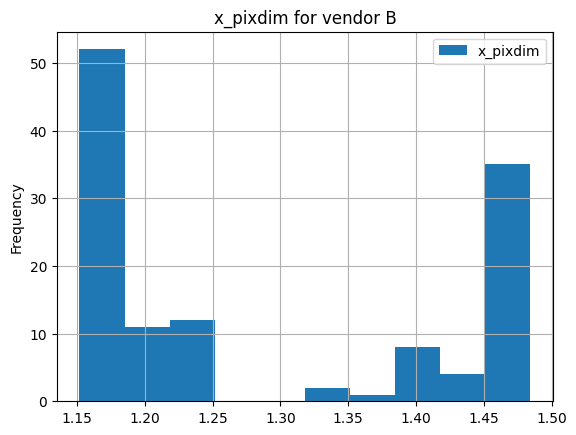

In [35]:
plot_data_dist("B", "x_pixdim", "hist")